In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [4]:
df = pd.read_csv(r'E:\subjects cs 4\course AI\datasets\Admission_Predict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.shape

(400, 9)

In [8]:
df.duplicated().any()

False

In [9]:
data = df.drop('Serial No.',axis=1)

In [10]:
X = df.drop('Chance of Admit',axis=1)
y = df['Chance of Admit']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [11]:

lr =LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [15]:
models = {
    'Linear Regression': lr,
    'SVR': svm,
    'Random Forest': rf
}

scores = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    score = metrics.r2_score(y_test, y_pred)
    scores[model_name] = score

for model_name, score in scores.items():
    print(f"{model_name}: {score}")

Linear Regression: 0.8212241793299225
SVR: 0.5890037862067816
Random Forest: 0.8552167895467706


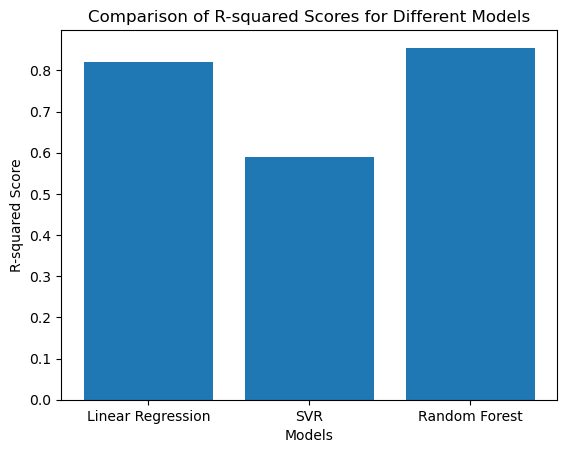

In [16]:
plt.bar(scores.keys(), scores.values())
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Different Models')
plt.show()